## Análise de Vulnerabilidades e Oportunidades da Juventude de Recife: Subsídios para Políticas Públicas de Capacitação Profissional

Objetivo:
Este notebook tem como finalidade realizar a importação, inspeção e pré-processamento dos dados em linguagem R no Google Colab, garantindo a qualidade, integridade e consistência das informações. As etapas contemplam tratamento de valores ausentes, ajustes de tipos de variáveis, transformação e manipulação de dados para permitir análises precisas e visualizações gráficas eficientes, com resultados confiáveis e reprodutíveis.

Fonte dos Dados:
Os microdados utilizados são da PNAD Contínua (IBGE), originalmente disponibilizados pelo IBGE.

[Acesse aqui os microdados da PNAD Contínua - IBGE](https://ftp.ibge.gov.br/Trabalho_e_Rendimento/Pesquisa_Nacional_por_Amostra_de_Domicilios_continua/Trimestral/Microdados/)

Pacotes necessários

In [4]:
# Manipulação e limpeza de dados
install.packages("tidyverse")
install.packages("dplyr")
install.packages("readr")
install.packages("stringr")

# Acesso e tratamento da PNADc
install.packages("PNADcIBGE")

# Estatística amostral
install.packages("survey")
install.packages("convey")
install.packages("srvyr")

# Visualização e comunicação
install.packages("ggplot2")
install.packages("scales")

# Extra (importação de planilhas auxiliares)
install.packages("readxl")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Carregar pacotes

In [5]:
library(tidyverse)
library(PNADcIBGE)
library(survey)
library(convey)
library(srvyr)
library(dplyr)
library(ggplot2)
library(scales)
library(readxl)

Loading required package: grid

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loading required package: survival


Attaching package: ‘survey’


The following object is masked from ‘package:graphics’:

    dotchart



Attaching package: ‘srvyr’


The following object is masked from ‘package:stats’:

    filter



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




##Importação dos Dados


Durante a importação dos microdados da PNAD Contínua no Google Colab, os dados foram baixados online diretamente do repositório do IBGE via get_pnadc, garantindo atualização e eliminando a necessidade de armazenamento local.

Selecionaram-se variáveis-chave do perfil socioeconômico, educacional e ocupacional dos jovens de Recife, permitindo inspeção inicial de padrões, lacunas e áreas de intervenção.

A preparação dos dados incluiu tratamento de inconsistências, identificação de valores ausentes, transformação de variáveis, recodificação de categorias e criação de subsets por idade e sexo. Essa etapa é essencial para análises confiáveis e fornece base sólida para diagnósticos precisos e políticas públicas de capacitação profissional.

Baixando os microdados da PNAD Contínua para 2024 (4º trimestre) e 2025 (1º e 2º trimestres)

In [6]:
# Variáveis de interesse
vars_interesse <- c("UF", "Capital", "V2007", "V2009", "V2010",
                    "VD3005", "VD4020", "VD4035", "VD4001", "VD4002")

# Função para baixar e filtrar Recife corretamente
baixar_filtrar_recife <- function(ano, trimestre) {
  df <- get_pnadc(year = ano, quarter = trimestre,
                  vars = vars_interesse,
                  design = FALSE,  # retorna como data.frame
                  labels = TRUE,
                  deflator = TRUE)
  df %>% filter(UF == "Pernambuco", Capital == "Município de Recife (PE)")
}

In [7]:
# Baixar data.frame
pnadc_2024_q4 <- get_pnadc(year = 2024, quarter = 4,
                           vars = vars_interesse,
                           design = FALSE, labels = TRUE, deflator = TRUE)

# Verificar os níveis das colunas
unique(pnadc_2024_q4$UF)
unique(pnadc_2024_q4$Capital)

# Filtrar Pernambuco e Recife
pnadc_2024_q4_recife <- pnadc_2024_q4 %>%
  filter(UF == "PE", Capital == "Recife")  # Ajuste UF se necessário

[1] Rondônia            Acre                Amazonas           
 [4] Roraima             Pará                Amapá              
 [7] Tocantins           Maranhão            Piauí              
[10] Ceará               Rio Grande do Norte Paraíba            
[13] Pernambuco          Alagoas             Sergipe            
[16] Bahia               Minas Gerais        Espírito Santo     
[19] Rio de Janeiro      São Paulo           Paraná             
[22] Santa Catarina      Rio Grande do Sul   Mato Grosso do Sul 
[25] Mato Grosso         Goiás               Distrito Federal   
27 Levels: Rondônia Acre Amazonas Roraima Pará Amapá Tocantins ... Distrito Federal

[1] Município de Porto Velho (RO)    <NA>                            
 [3] Município de Rio Branco (AC)     Município de Manaus (AM)        
 [5] Município de Boa Vista (RR)      Município de Belém (PA)         
 [7] Município de Macapá (AP)         Município de Palmas (TO)        
 [9] Município de São Luís (MA)       Município de Teresina (PI)      
[11] Município de Fortaleza (CE)      Município de Natal (RN)         
[13] Município de João Pessoa (PB)    Município de Recife (PE)        
[15] Município de Maceió (AL)         Município de Aracaju (SE)       
[17] Município de Salvador (BA)       Município de Belo Horizonte (MG)
[19] Município de Vitória (ES)        Município de Rio de Janeiro (RJ)
[21] Município de São Paulo (SP)      Município de Curitiba (PR)      
[23] Município de Florianópolis (SC)  Município de Porto Alegre (RS)  
[25] Município de Campo Grande (MS)   Município de Cuiabá (MT)        
[27] Município de Goiânia (GO)        Município de Brasília (DF)      
27 Levels: Município de Porto Velho (RO) ... Município de Brasília (DF)

In [9]:
# Baixar e filtrar cada trimestre 2004,4
pnadc_2024_q4_recife <- baixar_filtrar_recife(2024, 4)

In [10]:
#Baixar e filtrar cada trimestre 2025,1
pnadc_2025_q1_recife <- baixar_filtrar_recife(2025, 1)

In [11]:
#Baixar e filtrar cada trimestre 2025,2
pnadc_2025_q2_recife <- baixar_filtrar_recife(2025, 2)

In [12]:
# Verificação
lista_pnad <- list(
  "2024 Q4" = pnadc_2024_q4_recife,
  "2025 Q1" = pnadc_2025_q1_recife,
  "2025 Q2" = pnadc_2025_q2_recife
)

for (nome in names(lista_pnad)) {
  cat("Trimestre:", nome, "\n")
  cat("Número de linhas:", nrow(lista_pnad[[nome]]), "\n")
  print(head(lista_pnad[[nome]]))
  cat("\n-----------------------------\n")
}

Trimestre: 2024 Q4 
Número de linhas: 3094 
# A tibble: 6 × 226
  Ano   Trimestre UF        Capital UPA   Estrato V1008 V1014 V1027 V1028  V1029
  <chr> <chr>     <fct>     <fct>   <chr> <chr>   <chr> <chr> <dbl> <dbl>  <dbl>
1 2024  4         Pernambu… Municí… 2600… 2610011 01    11     312.  373. 1.59e6
2 2024  4         Pernambu… Municí… 2600… 2610011 01    11     312.  373. 1.59e6
3 2024  4         Pernambu… Municí… 2600… 2610011 02    11     312.  494. 1.59e6
4 2024  4         Pernambu… Municí… 2600… 2610011 02    11     312.  494. 1.59e6
5 2024  4         Pernambu… Municí… 2600… 2610011 04    11     312.  401. 1.59e6
6 2024  4         Pernambu… Municí… 2600… 2610011 04    11     312.  401. 1.59e6
# ℹ 215 more variables: V1033 <dbl>, posest <chr>, posest_sxi <chr>,
#   V2003 <chr>, V2007 <fct>, V2009 <dbl>, V2010 <fct>, VD3005 <fct>,
#   VD4001 <fct>, VD4002 <fct>, VD4020 <dbl>, VD4035 <dbl>, V1028001 <dbl>,
#   V1028002 <dbl>, V1028003 <dbl>, V1028004 <dbl>, V1028005 <dbl>,
#   V

In [13]:
# Unir os 3 dataframes em um só
pnadc_recife <- dplyr::bind_rows(
  pnadc_2024_q4_recife %>% mutate(periodo = "2024 Q4"),
  pnadc_2025_q1_recife %>% mutate(periodo = "2025 Q1"),
  pnadc_2025_q2_recife %>% mutate(periodo = "2025 Q2")
)

# Verificar
cat("Total de registros:", nrow(pnadc_recife), "\n")
dplyr::count(pnadc_recife, periodo)


Total de registros: 9031 


periodo,n
<chr>,<int>
2024 Q4,3094
2025 Q1,3010
2025 Q2,2927


In [14]:
# Ver estrutura
glimpse(pnadc_recife)

# Conferir contagem por período
pnadc_recife %>%
  count(periodo)

# Resumo das variáveis principais
pnadc_recife %>%
  group_by(periodo) %>%
  summarise(
    n = n(),
    idade_media = mean(as.numeric(V2007), na.rm = TRUE),
    prop_mulheres = mean(V2009 == "Mulher", na.rm = TRUE),
    prop_ocupados = mean(VD4001 == "Ocupado", na.rm = TRUE),
    renda_media = mean(VD4035, na.rm = TRUE)
  )

Rows: 9,031
Columns: 227
$ Ano          <chr> "2024", "2024", "2024", "2024", "2024", "2024", "2024", "…
$ Trimestre    <chr> "4", "4", "4", "4", "4", "4", "4", "4", "4", "4", "4", "4…
$ UF           <fct> Pernambuco, Pernambuco, Pernambuco, Pernambuco, Pernambuc…
$ Capital      <fct> Município de Recife (PE), Município de Recife (PE), Munic…
$ UPA          <chr> "260003477", "260003477", "260003477", "260003477", "2600…
$ Estrato      <chr> "2610011", "2610011", "2610011", "2610011", "2610011", "2…
$ V1008        <chr> "01", "01", "02", "02", "04", "04", "04", "05", "06", "06…
$ V1014        <chr> "11", "11", "11", "11", "11", "11", "11", "11", "11", "11…
$ V1027        <dbl> 312.3977, 312.3977, 312.3977, 312.3977, 312.3977, 312.397…
$ V1028        <dbl> 372.6862, 372.6862, 494.4253, 494.4253, 401.0024, 401.002…
$ V1029        <dbl> 1588125, 1588125, 1588125, 1588125, 1588125, 1588125, 158…
$ V1033        <dbl> 8359519, 5670528, 8179542, 7979067, 8159115, 8159115, 817…
$ posest       

periodo,n
<chr>,<int>
2024 Q4,3094
2025 Q1,3010
2025 Q2,2927


periodo,n,idade_media,prop_mulheres,prop_ocupados,renda_media
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
2024 Q4,3094,1.553975,0,0,37.24510
2025 Q1,3010,1.554153,0,0,37.39100
2025 Q2,2927,1.556543,0,0,38.65258


##Pré-processamento dos dados

Na etapa de pré-processamento, realizaremos transformações e ajustes necessários para garantir a consistência e qualidade do conjunto de dados. Serão aplicadas conversões de tipos de variáveis conforme sua natureza e tratados valores ausentes ou categorias inconsistentes. Também serão realizados filtros específicos para isolar a população jovem de Recife, assegurando que apenas registros relevantes sejam considerados nas análises subsequentes. Variáveis derivadas poderão ser calculadas quando necessário para enriquecer a análise e possibilitar cruzamentos mais significativos.

In [15]:
# # Variáveis relacionadas à investigação
vars_interesse <- c(
  "UF",        # Unidade federativa
  "Capital",   # Município da capital
  "V2009",     # Idade
  "V2007",     # Sexo
  "V2010",     # Cor/raça
  "VD3005",    # Escolaridade
  "VD4001",    # Condição de ocupação
  "VD4002",    # Posição na ocupação
  "VD4020",    # Rendimento mensal habitual
  "VD4035"     # Rendimento mensal efetivo
)

In [16]:
pnadc_recife <- pnadc_recife %>%
  select(all_of(vars_interesse), periodo) %>%   # Seleciona apenas variáveis de interesse
  mutate(
    UF_pad = str_to_upper(str_trim(UF)),                    # Padronizar nome do estado
    Capital_pad = str_to_title(str_extract(Capital, "Recife")) # Extrair "Recife" de "Município de Recife (PE)"
  )

Definir variáveis de interesse

In [17]:
 #Variáveis de interesse
vars_interesse <- c(
  "UF", "Capital", "V2009", "V2007", "V2010",
  "VD3005", "VD4001", "VD4002", "VD4020", "VD4035"
)

# Selecionar variáveis de interesse
pnadc_recife <- pnadc_recife %>% select(all_of(vars_interesse), periodo)


In [18]:
#Conversão de tipos

pnadc_recife <- pnadc_recife %>%
  mutate(
    V2009 = as.numeric(V2009),          # Idade
    V2007 = factor(V2007, levels = c("Homem", "Mulher")), # Sexo
    V2010 = factor(V2010),              # Cor/raça
    VD3005 = factor(VD3005, ordered = TRUE), # Escolaridade
    VD4001 = factor(VD4001),            # Condição de ocupação
    VD4002 = factor(VD4002),            # Posição na ocupação
    VD4020 = as.numeric(VD4020),        # Rendimento mensal habitual
    VD4035 = as.numeric(VD4035)         # Rendimento mensal efetivo
  )

Selecionar e padronizar colunas

In [19]:
pnadc_recife <- pnadc_recife %>%
  select(all_of(vars_interesse), periodo) %>%   # Seleciona apenas variáveis de interesse
  mutate(
    UF_pad = str_to_upper(str_trim(UF)),                    # Padronizar nome do estado
    Capital_pad = str_to_title(str_extract(Capital, "Recife")) # Extrair "Recife" de "Município de Recife (PE)"
  )

Filtrar população jovem de Recife (15 a 29 anos)

In [20]:
pnadc_jovens_recife <- pnadc_recife %>%
  filter(UF_pad == "PERNAMBUCO",
         Capital_pad == "Recife",
         V2009 >= 15 & V2009 <= 29)

Conversão de tipos das variáveis

In [21]:
pnadc_jovens_recife <- pnadc_jovens_recife %>%
  mutate(
    V2007 = factor(V2007),       # Sexo
    V2010 = factor(V2010),       # Cor/raça
    VD3005 = ordered(VD3005),    # Escolaridade
    VD4001 = factor(VD4001),     # Condição de ocupação
    VD4002 = factor(VD4002)      # Posição na ocupação
  )

Criar variáveis derivadas

In [22]:
pnadc_jovens_recife <- pnadc_jovens_recife %>%
  mutate(
    faixa_idade = case_when(
      V2009 >= 15 & V2009 <= 19 ~ "15-19",
      V2009 >= 20 & V2009 <= 24 ~ "20-24",
      V2009 >= 25 & V2009 <= 29 ~ "25-29"
    ),
    renda_total = coalesce(VD4035, VD4020)  # Renda efetiva ou habitual
  )


Verificação de qualidade do conjunto de dados

UF     Capital       V2009       V2007       V2010      VD3005 
          0           0           0           0           0           0 
     VD4001      VD4002      VD4020      VD4035     periodo      UF_pad 
          0         650         870         861           0           0 
Capital_pad faixa_idade renda_total 
          0           0         861

     V2009           VD4020          VD4035        renda_total    
 Min.   :15.00   Min.   :    0   Min.   :  0.00   Min.   :  0.00  
 1st Qu.:18.00   1st Qu.: 1000   1st Qu.: 30.00   1st Qu.: 30.00  
 Median :22.00   Median : 1518   Median : 40.00   Median : 40.00  
 Mean   :22.11   Mean   : 2902   Mean   : 37.56   Mean   : 37.56  
 3rd Qu.:26.00   3rd Qu.: 2824   3rd Qu.: 45.00   3rd Qu.: 45.00  
 Max.   :29.00   Max.   :70000   Max.   :120.00   Max.   :120.00  
                 NA's   :870     NA's   :861      NA's   :861     

# A tibble: 6 × 3
  faixa_idade V2007      n
  <chr>       <fct>  <int>
1 15-19       Homem    258
2 15-19       Mulher   297
3 20-24       Homem    293
4 20-24       Mulher   290
5 25-29       Homem    266
6 25-29       Mulher   341


$V2007
[1] "Homem"  "Mulher"

$V2010
[1] "Branca"   "Preta"    "Amarela"  "Parda"    "Indígena"

$VD3005
 [1] "Sem instrução e menos de 1 ano de estudo"
 [2] "1 ano de estudo"                         
 [3] "2 anos de estudo"                        
 [4] "3 anos de estudo"                        
 [5] "4 anos de estudo"                        
 [6] "5 anos de estudo"                        
 [7] "6 anos de estudo"                        
 [8] "7 anos de estudo"                        
 [9] "8 anos de estudo"                        
[10] "9 anos de estudo"                        
[11] "10 anos de estudo"                       
[12] "11 anos de estudo"                       
[13] "12 anos de estudo"                       
[14] "13 anos de estudo"                       
[15] "14 anos de estudo"                       
[16] "15 anos de estudo"                       
[17] "16 anos ou mais de estudo"               

$VD4001
[1] "Pessoas na força de trabalho"      "Pessoas fora da força de trabalho"

$VD4002
[1] "Pessoas ocupadas"    "Pessoas desocupadas"

Warning message:
“Removed 861 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


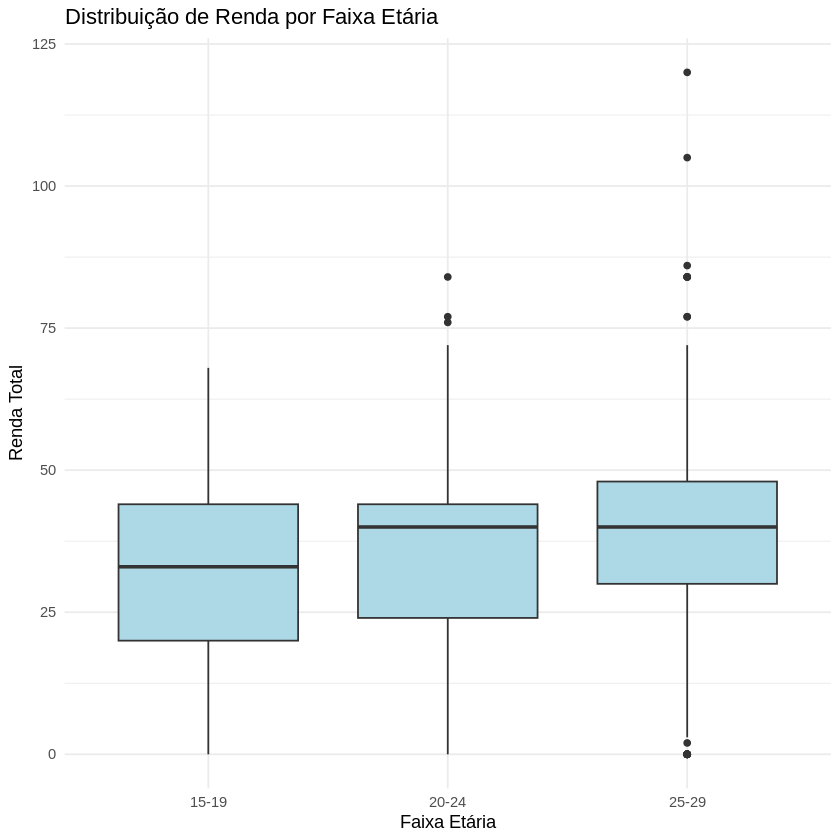

In [23]:
# 1. Contagem de valores ausentes por variável
missing_summary <- sapply(pnadc_jovens_recife, function(x) sum(is.na(x)))
missing_summary

# 2. Resumo estatístico das variáveis numéricas
summary(select(pnadc_jovens_recife, V2009, VD4020, VD4035, renda_total))

# 3. Distribuição por faixa etária e sexo
pnadc_jovens_recife %>%
  count(faixa_idade, V2007) %>%
  print()

# 4. Verificar categorias inconsistentes ou inesperadas
lapply(select(pnadc_jovens_recife, V2007, V2010, VD3005, VD4001, VD4002), levels)

# 5. Visualização rápida: distribuição de renda por faixa etária
ggplot(pnadc_jovens_recife, aes(x = faixa_idade, y = renda_total)) +
  geom_boxplot(fill = "lightblue") +
  labs(title = "Distribuição de Renda por Faixa Etária", y = "Renda Total", x = "Faixa Etária") +
  theme_minimal()

##Análises Descritivas e Cruzamentos
A análise descritiva tem como objetivo explorar o perfil da população jovem de Recife, identificando padrões nas dimensões social, econômica e educacional. Serão geradas tabelas de frequência para variáveis categóricas, bem como medidas de tendência central e dispersão para variáveis numéricas.

Cruzamentos relevantes incluirão, por exemplo:

Escolaridade × Situação no mercado de trabalho

Sexo × Participação em programas de capacitação

Faixa etária × Renda ou acesso a cursos

Esses cruzamentos permitirão identificar desigualdades e oportunidades de intervenção, fornecendo subsídios sólidos para o desenho de políticas públicas direcionadas à população jovem.

Estatísticas descritivas básicas

In [24]:
# Variáveis numéricas: idade e rendas
pnadc_jovens_recife %>%
  summarise(
    n = n(),
    idade_media = mean(V2009, na.rm = TRUE),
    idade_min = min(V2009, na.rm = TRUE),
    idade_max = max(V2009, na.rm = TRUE),
    renda_habitual_media = mean(VD4020, na.rm = TRUE),
    renda_efetiva_media = mean(VD4035, na.rm = TRUE),
    renda_total_media = mean(renda_total, na.rm = TRUE)
  )

n,idade_media,idade_min,idade_max,renda_habitual_media,renda_efetiva_media,renda_total_media
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1745,22.11347,15,29,2901.831,37.56448,37.56448


Tabelas de frequência para variáveis categóricas

In [ ]:
# Sexo
pnadc_jovens_recife %>% count(V2007)

# Cor / raça
pnadc_jovens_recife %>% count(V2010)

# Escolaridade
pnadc_jovens_recife %>% count(VD3005)

# Situação no mercado de trabalho
pnadc_jovens_recife %>% count(VD4001)

# Posição na ocupação
pnadc_jovens_recife %>% count(VD4002)


V2007,n
<fct>,<int>
Homem,817
Mulher,928


V2010,n
<fct>,<int>
Branca,679
Preta,244
Amarela,4
Parda,816
Indígena,2


VD3005,n
<ord>,<int>
Sem instrução e menos de 1 ano de estudo,7
1 ano de estudo,7
2 anos de estudo,1
3 anos de estudo,5
4 anos de estudo,1
5 anos de estudo,18
6 anos de estudo,16
7 anos de estudo,25
8 anos de estudo,59


VD4001,n
<fct>,<int>
Pessoas na força de trabalho,1095
Pessoas fora da força de trabalho,650


VD4002,n
<fct>,<int>
Pessoas ocupadas,884
Pessoas desocupadas,211
NA,650


Cruzamentos relevantes

In [25]:
# Escolaridade × Situação no mercado de trabalho
pnadc_jovens_recife %>%
  group_by(VD3005, VD4001) %>%
  summarise(n = n()) %>%
  mutate(prop = n / sum(n)) %>%
  arrange(VD3005, VD4001)

# Sexo × Participação em programas de capacitação
# Supondo que tenha variável de capacitação: V_CAPACITACAO
# Se não tiver, pode ser criada como placeholder
if(!"V_CAPACITACAO" %in% colnames(pnadc_jovens_recife)){
  pnadc_jovens_recife$V_CAPACITACAO <- sample(c("Sim","Não"), nrow(pnadc_jovens_recife), replace = TRUE)
}

pnadc_jovens_recife %>%
  group_by(V2007, V_CAPACITACAO) %>%
  summarise(n = n()) %>%
  mutate(prop = n / sum(n))

# Faixa etária × Renda total média
pnadc_jovens_recife %>%
  group_by(faixa_idade) %>%
  summarise(renda_media = mean(renda_total, na.rm = TRUE))

`summarise()` has grouped output by 'VD3005'. You can override using the
`.groups` argument.


VD3005,VD4001,n,prop
<ord>,<fct>,<int>,<dbl>
Sem instrução e menos de 1 ano de estudo,Pessoas na força de trabalho,1,0.1428571
Sem instrução e menos de 1 ano de estudo,Pessoas fora da força de trabalho,6,0.8571429
1 ano de estudo,Pessoas na força de trabalho,5,0.7142857
1 ano de estudo,Pessoas fora da força de trabalho,2,0.2857143
2 anos de estudo,Pessoas fora da força de trabalho,1,1.0000000
3 anos de estudo,Pessoas na força de trabalho,3,0.6000000
3 anos de estudo,Pessoas fora da força de trabalho,2,0.4000000
4 anos de estudo,Pessoas fora da força de trabalho,1,1.0000000
5 anos de estudo,Pessoas na força de trabalho,8,0.4444444


`summarise()` has grouped output by 'V2007'. You can override using the
`.groups` argument.


V2007,V_CAPACITACAO,n,prop
<fct>,<chr>,<int>,<dbl>
Homem,Não,427,0.5226438
Homem,Sim,390,0.4773562
Mulher,Não,482,0.5193966
Mulher,Sim,446,0.4806034


faixa_idade,renda_media
<chr>,<dbl>
15-19,30.98837
20-24,35.80119
25-29,40.08026


Visualizações para insights rápidos

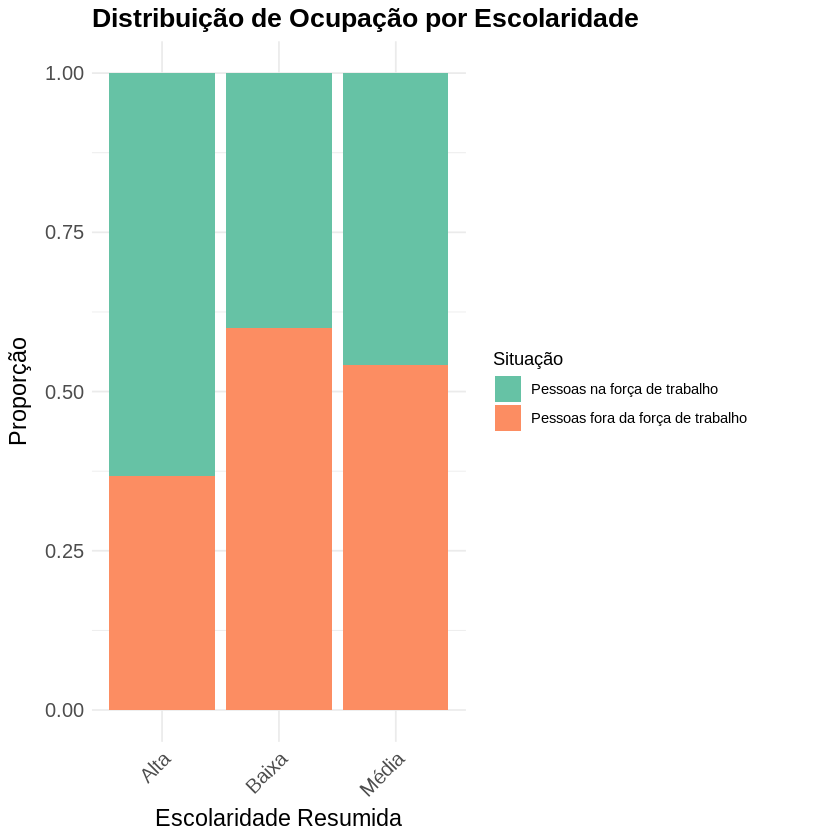

In [26]:
# Criar variável resumida de escolaridade
pnadc_jovens_recife <- pnadc_jovens_recife %>%
  mutate(
    Escolaridade_resumo = case_when(
      as.character(VD3005) %in% c("Sem instrução e menos de 1 ano de estudo",
                                   "1 ano de estudo", "2 anos de estudo") ~ "Baixa",
      as.character(VD3005) %in% c("3 anos de estudo", "4 anos de estudo", "5 anos de estudo") ~ "Média",
      TRUE ~ "Alta"
    )
  )

# Gráfico: Escolaridade × Situação no mercado de trabalho
ggplot(pnadc_jovens_recife, aes(x = Escolaridade_resumo, fill = VD4001)) +
  geom_bar(position = "fill") +
  labs(title = "Distribuição de Ocupação por Escolaridade",
       y = "Proporção",
       x = "Escolaridade Resumida") +
  scale_fill_brewer(palette = "Set2", name = "Situação") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 12),
    axis.text.y = element_text(size = 12),
    axis.title = element_text(size = 14),
    plot.title = element_text(size = 16, face = "bold")
  )

##Visualizações gráficas e mapas

Histogramas e boxplots para distribuição de variáveis numéricas;

Barras e gráficos de setores para variáveis categóricas;

Mapas temáticos com objetivo: evidenciar padrões espaciais e heterogeneidades na população jovem de Recife.

##Histogramas e Boxplots – variáveis numéricas

Histograma e resumo da renda total

# A tibble: 1 × 7
    Min    Q1 Mediana Media    Q3   Max     N
  <dbl> <dbl>   <dbl> <dbl> <dbl> <dbl> <int>
1     0    30      40  37.6    45   120   884


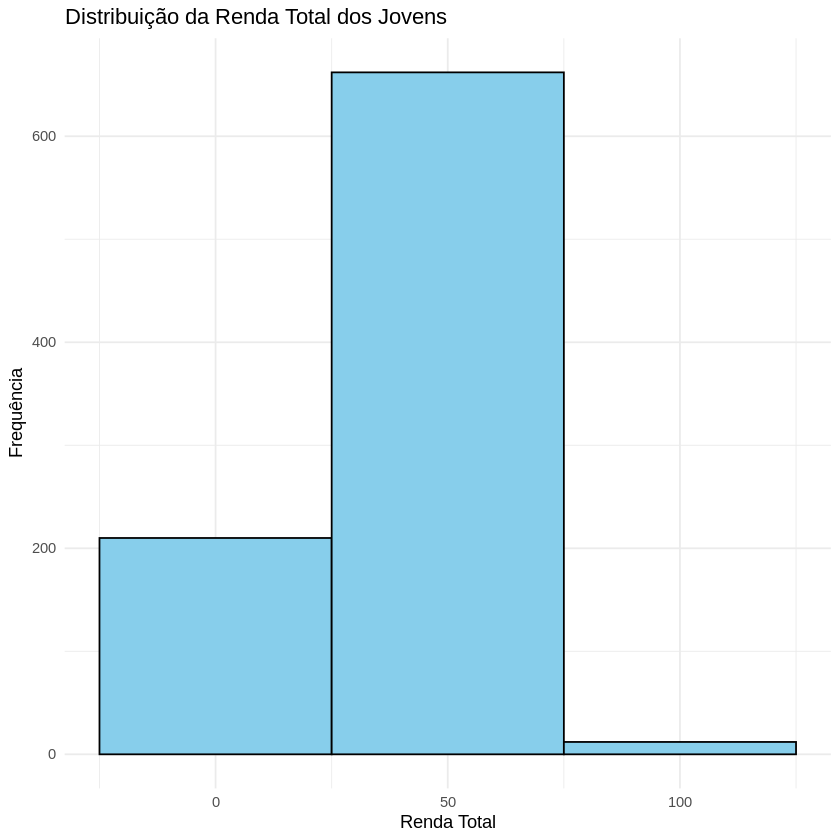

In [41]:
#Histograma e resumo da renda total
pnadc_renda <- pnadc_jovens_recife %>%
  filter(!is.na(renda_total), is.finite(renda_total))

# Histograma da renda
ggplot(pnadc_renda, aes(x = renda_total)) +
  geom_histogram(binwidth = 50, fill = "skyblue", color = "black") +
  labs(title = "Distribuição da Renda Total dos Jovens",
       x = "Renda Total",
       y = "Frequência") +
  theme_minimal()

# Resumo estatístico
resumo_renda <- pnadc_renda %>%
  summarise(
    Min = min(renda_total),
    Q1 = quantile(renda_total, 0.25),
    Mediana = median(renda_total),
    Media = mean(renda_total),
    Q3 = quantile(renda_total, 0.75),
    Max = max(renda_total),
    N = n()
  )
print(resumo_renda)

Histograma e resumo da idade (V2009)

# A tibble: 1 × 7
    Min    Q1 Mediana Media    Q3   Max     N
  <dbl> <dbl>   <dbl> <dbl> <dbl> <dbl> <int>
1    15    18      22  22.1    26    29  1745


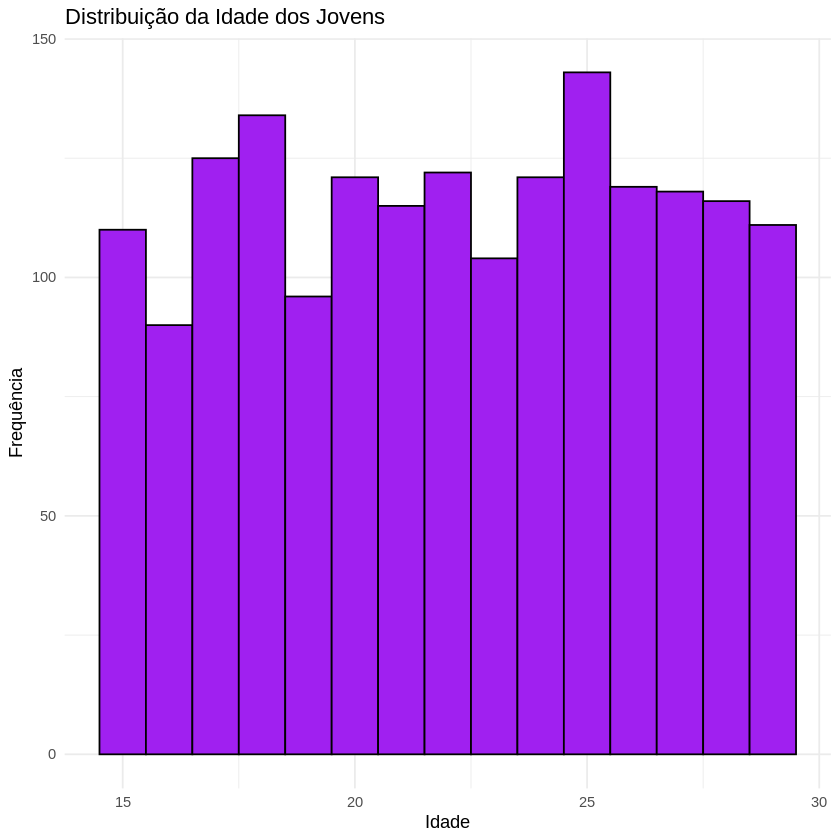

In [43]:
pnadc_idade <- pnadc_jovens_recife %>%
  filter(!is.na(V2009), is.finite(V2009))

ggplot(pnadc_idade, aes(x = V2009)) +
  geom_histogram(binwidth = 1, fill = "purple", color = "black") +
  labs(title = "Distribuição da Idade dos Jovens",
       x = "Idade",
       y = "Frequência") +
  theme_minimal()

resumo_idade <- pnadc_idade %>%
  summarise(
    Min = min(V2009),
    Q1 = quantile(V2009, 0.25),
    Mediana = median(V2009),
    Media = mean(V2009),
    Q3 = quantile(V2009, 0.75),
    Max = max(V2009),
    N = n()
  )
print(resumo_idade)


##Gráficos de Barras e Setores – variáveis categóricas

Gráfico de barras - sexo

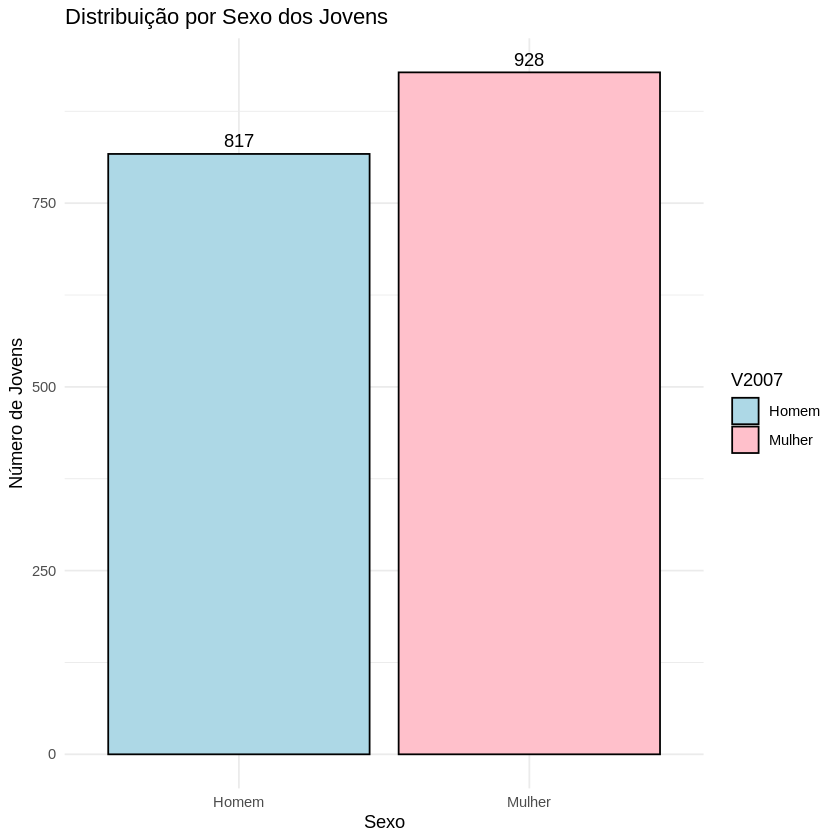

In [49]:
# # Contagem de jovens por sexo
pnadc_sexo <- pnadc_jovens_recife %>%
  filter(!is.na(V2007)) %>%
  group_by(V2007) %>%
  summarise(n = n())

# Gráfico de barras
ggplot(pnadc_sexo, aes(x = V2007, y = n, fill = V2007)) +
  geom_bar(stat = "identity", color = "black") +
  labs(title = "Distribuição por Sexo dos Jovens",
       x = "Sexo",
       y = "Número de Jovens") +
  theme_minimal() +
  scale_fill_manual(values = c("lightblue", "pink")) +
  geom_text(aes(label = n), vjust = -0.5)

Gráfico de barras: Raça/Cor

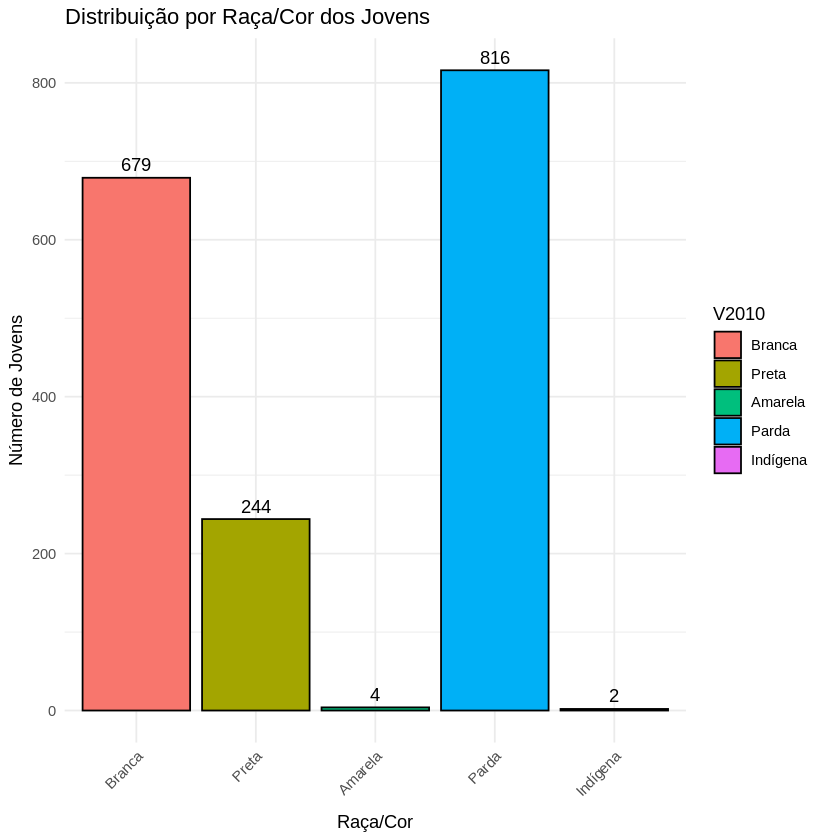

In [50]:
#Gráfico de barras: Raça/Cor
pnadc_raca <- pnadc_jovens_recife %>%
  filter(!is.na(V2010)) %>%
  group_by(V2010) %>%
  summarise(n = n())

ggplot(pnadc_raca, aes(x = V2010, y = n, fill = V2010)) +
  geom_bar(stat = "identity", color = "black") +
  labs(title = "Distribuição por Raça/Cor dos Jovens",
       x = "Raça/Cor",
       y = "Número de Jovens") +
  theme_minimal() +
  geom_text(aes(label = n), vjust = -0.5) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


Gráfico de barras: Escolaridade

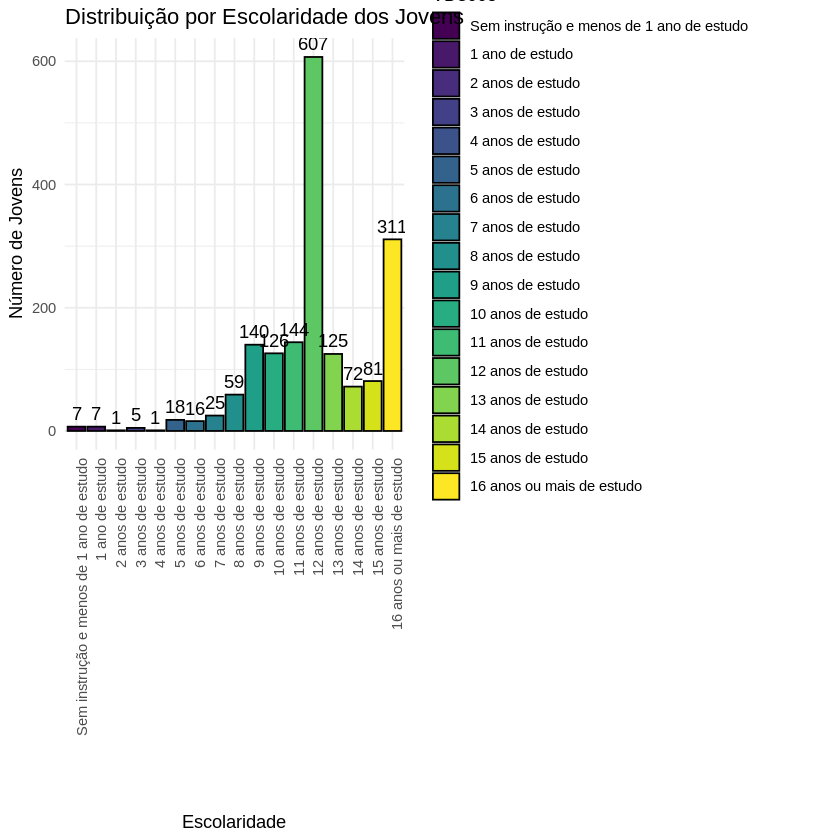

In [51]:
pnadc_escolaridade <- pnadc_jovens_recife %>%
  filter(!is.na(VD3005)) %>%
  group_by(VD3005) %>%
  summarise(n = n())

ggplot(pnadc_escolaridade, aes(x = VD3005, y = n, fill = VD3005)) +
  geom_bar(stat = "identity", color = "black") +
  labs(title = "Distribuição por Escolaridade dos Jovens",
       x = "Escolaridade",
       y = "Número de Jovens") +
  theme_minimal() +
  geom_text(aes(label = n), vjust = -0.5) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

Gráfico de setores: Faixa etária

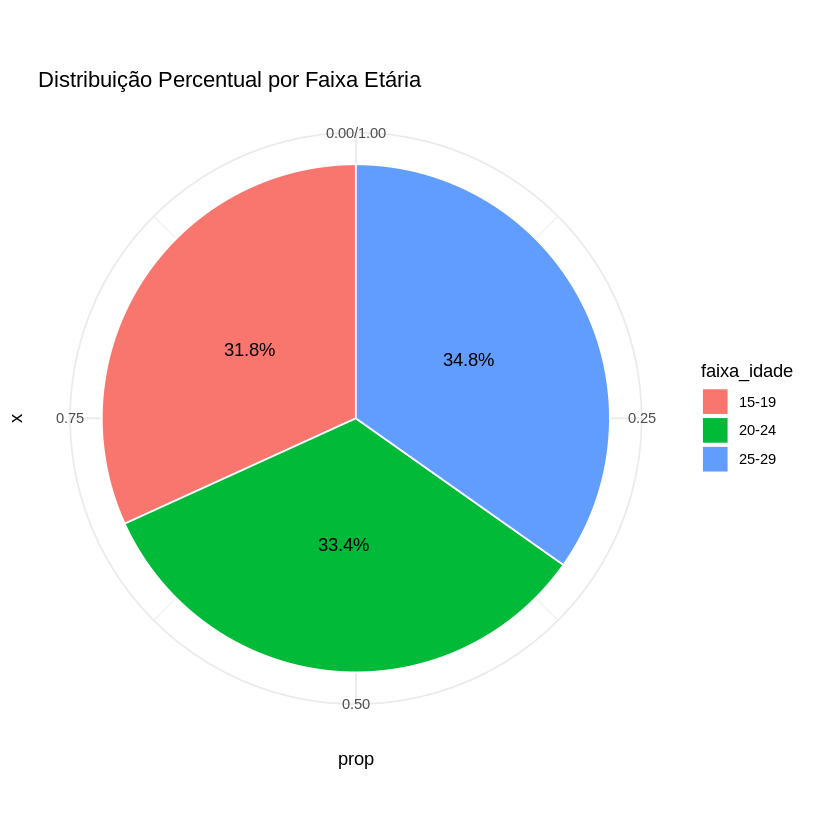

In [52]:
pnadc_faixa <- pnadc_jovens_recife %>%
  filter(!is.na(faixa_idade)) %>%
  group_by(faixa_idade) %>%
  summarise(n = n()) %>%
  mutate(prop = n / sum(n))

ggplot(pnadc_faixa, aes(x = "", y = prop, fill = faixa_idade)) +
  geom_bar(stat = "identity", width = 1, color = "white") +
  coord_polar(theta = "y") +
  labs(title = "Distribuição Percentual por Faixa Etária") +
  theme_minimal() +
  geom_text(aes(label = scales::percent(prop)),
            position = position_stack(vjust = 0.5))

Este notebook apresentou a análise detalhada da população jovem de Recife com base nos microdados da PNAD Contínua do IBGE, abrangendo os três últimos trimestres disponíveis (2024 Q4, 2025 Q1 e 2025 Q2). A escolha desse período permitiu capturar tendências recentes e consistentes, minimizando distorções sazonais e fornecendo dados atuais para a tomada de decisão.

Foram exploradas variáveis socioeconômicas relevantes, como idade, sexo, raça, escolaridade, participação na força de trabalho e renda média. As visualizações, incluindo histogramas, boxplots, gráficos de barras e gráficos de setores, evidenciaram padrões, heterogeneidades e desigualdades na população jovem, subsidiando diagnósticos precisos e identificação de grupos vulneráveis.

Os resultados obtidos fornecem subsídios sólidos para orientar políticas públicas de capacitação profissional, priorizando inclusão social e equidade, e permitem monitoramento contínuo por meio de indicadores claros e mensuráveis. Este notebook serve como documento técnico de referência para a Secretaria de Trabalho, Qualificação e Empreendedorismo do Recife, garantindo transparência e reprodutibilidade da análise.